# Before you start :
   - These exercises are related to the Subsetting and Descriptive Stats lessons.
   - Keep in mind that you need to use some of the functions you learned in the previous lessons.
   - All datasets are provided in the `your-code` folder of this lab.
   - Elaborate your codes and outputs as much as you can.
   - Try your best to answer the questions and complete the tasks and most importantly enjoy the process!!!

#### Import all the libraries that are necessary

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

# Challenge 1

#### In this challenge we will use the `Temp_States.csv` file. 

#### First import it into a data frame called `temp`.

In [2]:
temp = pd.read_csv('Temp_States.csv')



#### Print `temp`

In [3]:
temp

,City,State,Temperature
0,NYC,New York,19.444444
1,Albany,New York,9.444444
2,Buffalo,New York,3.333333
3,Hartford,Connecticut,17.222222
4,Bridgeport,Connecticut,14.444444
5,Treton,New Jersey,22.222222
6,Newark,New Jersey,20.000000


#### Explore the data types of the Temp dataframe. What type of data do we have? Comment your result.

In [4]:
temp.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   City         7 non-null      object 
 1   State        7 non-null      object 
 2   Temperature  7 non-null      float64
dtypes: float64(1), object(2)
memory usage: 296.0+ bytes


* In column `city` we have city names as string type.
* In `State` we have states names as string type.
* In `Temperature` we have temperature values as float type.

#### Select the rows where state is New York

In [5]:
temp[temp.State == 'New York']

,City,State,Temperature
0,NYC,New York,19.444444
1,Albany,New York,9.444444
2,Buffalo,New York,3.333333


#### What is the average of the temperature of cities in New York?

In [6]:
temp[temp.State == 'New York'].Temperature.mean()


10.74074074074074

#### We want to know cities and states with Temperature above 15 degress Celcius

In [7]:
temp[temp.Temperature > 15][['City','State']]


,City,State
0,NYC,New York
3,Hartford,Connecticut
5,Treton,New Jersey
6,Newark,New Jersey


#### Now, return only the cities that have a temperature above 15 degress Celcius

In [8]:
temp[temp.Temperature > 15][['City']]

,City
0,NYC
3,Hartford
5,Treton
6,Newark


#### We want to know which cities have a temperature above 15 degrees Celcius and below 20 degrees Celcius

*Hint: First write the condition then select the rows.*

In [9]:
temp[(temp.Temperature > 15) & (temp.Temperature < 20)][['City']]


,City
0,NYC
3,Hartford


#### Find the mean and the standard deviation of the temperature of each state.

*Hint: Use functions from Data Manipulation lesson*

In [10]:
temp.groupby('State').agg([np.mean, np.std])


Temperature          
                   mean       std
State                            
Connecticut   15.833333  1.964186
New Jersey    21.111111  1.571348
New York      10.740741  8.133404

# Challenge 2

#### Load the `employee.csv` file into a DataFrame. Call the dataframe `employee`

In [11]:
employee = pd.read_csv('Employee.csv')

#### Explore the data types of the Temp dataframe. Comment your results

In [12]:
employee.head()

,Name,Department,Education,Gender,Title,Years,Salary
0,Jose,IT,Bachelor,M,analyst,1,35
1,Maria,IT,Master,F,analyst,2,30
2,David,HR,Master,M,analyst,2,30
3,Sonia,HR,Bachelor,F,analyst,4,35
4,Samuel,Sales,Master,M,associate,3,55


In [13]:
employee.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Name        9 non-null      object
 1   Department  9 non-null      object
 2   Education   9 non-null      object
 3   Gender      9 non-null      object
 4   Title       9 non-null      object
 5   Years       9 non-null      int64 
 6   Salary      9 non-null      int64 
dtypes: int64(2), object(5)
memory usage: 632.0+ bytes


This dataframe contain information regarding employees of a company, with name, department, education type, gender, Title, years in company and his/her salary.

In [14]:
employee.Department.value_counts()

IT       4
HR       3
Sales    2
Name: Department, dtype: int64

In [15]:
employee.Education.value_counts()

Master      5
Bachelor    3
Phd         1
Name: Education, dtype: int64

In [16]:
employee.Title.value_counts()

analyst      4
associate    3
VP           2
Name: Title, dtype: int64

In [17]:
employee.describe()

,Years,Salary
count,9.000000,9.000000
mean,4.111111,48.888889
std,2.803767,16.541194
min,1.000000,30.000000
25%,2.000000,35.000000
50%,3.000000,55.000000
75%,7.000000,60.000000
max,8.000000,70.000000


#### Show visually the frequency distribution (histogram) of the employee dataset. In few words describe these histograms?

Let's use histograms to represent frequency of number fields (it can also be done for categorical data like 'Education' or 'department')

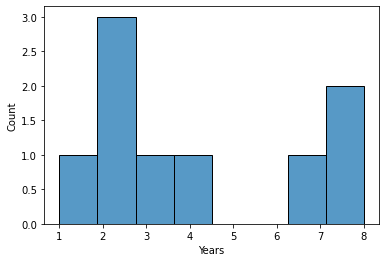

In [18]:
sns.histplot(x = employee.Years, bins = 8)

This histogram represents the frequency of number of years in company among employees.

Now, let's imagine we specify as a 'Junior' , an employee with less or equal 4 yeas in the company, and above that it is considered as 'Senior'. This histogram shows distribution. there are more rookie employees than seniors.

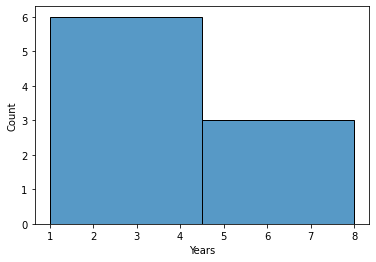

In [19]:
sns.histplot(x = employee.Years, bins = 2)

Now for salaries:

It seems there is a gap between salaries between approximately 37K and 54 K.

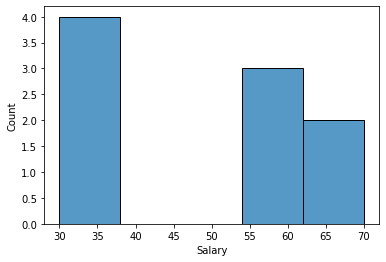

In [20]:
sns.histplot(x = employee.Salary)

#### What's the average salary in this company?

In [21]:
employee.Salary.mean()

48.888888888888886

#### What's the highest salary?

In [22]:
employee.Salary.max()

70

#### What's the lowest salary?

In [23]:
employee.Salary.min()

30

#### Who are the employees with the lowest salary?

In [24]:
employee.sort_values('Salary').head(1)

,Name,Department,Education,Gender,Title,Years,Salary
1,Maria,IT,Master,F,analyst,2,30


#### Could you give all the information about an employee called David?

In [25]:
employee[employee.Name == 'David']


,Name,Department,Education,Gender,Title,Years,Salary
2,David,HR,Master,M,analyst,2,30


#### Could you give only David's salary?

In [26]:
employee[employee.Name == 'David'].Salary



2    30
Name: Salary, dtype: int64

#### Print all the rows where job title is associate

In [27]:
employee[employee.Title == 'associate']

,Name,Department,Education,Gender,Title,Years,Salary
4,Samuel,Sales,Master,M,associate,3,55
5,Eva,Sales,Bachelor,F,associate,2,55
7,Pedro,IT,Phd,M,associate,7,60


#### Print the first 3 rows of your dataframe

##### Tip : There are 2 ways to do it. Do it both ways

In [28]:
# your answer here- 1 method
employee.head(3)

,Name,Department,Education,Gender,Title,Years,Salary
0,Jose,IT,Bachelor,M,analyst,1,35
1,Maria,IT,Master,F,analyst,2,30
2,David,HR,Master,M,analyst,2,30


In [29]:
# your answer here- 2nd method
employee[:3]

,Name,Department,Education,Gender,Title,Years,Salary
0,Jose,IT,Bachelor,M,analyst,1,35
1,Maria,IT,Master,F,analyst,2,30
2,David,HR,Master,M,analyst,2,30


#### Find the employees who's title is associate and the salary above 55?

In [30]:
employee[(employee.Title == 'associate') & (employee.Salary > 55)]


,Name,Department,Education,Gender,Title,Years,Salary
7,Pedro,IT,Phd,M,associate,7,60


#### Group the employees based on their number of years of employment. What are the average salaries in each group?

In [31]:
employee.groupby('Years').Salary.mean()

Years
1    35.000000
2    38.333333
3    55.000000
4    35.000000
7    60.000000
8    70.000000
Name: Salary, dtype: float64

####  What is the average Salary per title?

In [32]:
employee.groupby('Title').Salary.mean()

Title
VP           70.000000
analyst      32.500000
associate    56.666667
Name: Salary, dtype: float64

#### Show a visual summary of the data using boxplot. What Are the First and Third Quartiles? Comment your results.
##### * Hint : Quantiles vs Quartiles*
##### - `In Probability and Statistics, quantiles are cut points dividing the range of a probability distribution into continuous intervals with equal probabilities. When division is into four parts the values of the variate corresponding to 25%, 50% and 75% of the total distribution are called quartiles.`

Let's do it for salaries

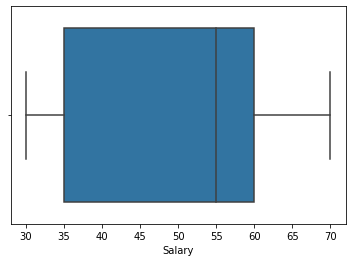

In [33]:
sns.boxplot(x=employee.Salary)

In [34]:
employee.Salary.quantile(0.25)

35.0

In [35]:
employee.Salary.quantile(0.75)

60.0

In the boxplot it is display the min, max, median, first quartile and third quartile which gives info about the disbtribution of salaries among the company.

Median looks quite on the right, close to third quartile, which indicates that salaries are concentrated at high values

#### Is the mean salary per gender different?

In [36]:
employee.groupby('Gender').Salary.mean()

Gender
F    47.5
M    50.0
Name: Salary, dtype: float64

#### Find the minimum, mean and the maximum of all numeric columns for each Department.

##### Hint: Use functions from Data Manipulation lesson

In [37]:
employee.groupby('Department').agg([np.min, np.max, np.mean])

Years                Salary            
            amin amax      mean   amin amax   mean
Department                                        
HR             2    8  4.666667     30   70  45.00
IT             1    8  4.500000     30   70  48.75
Sales          2    3  2.500000     55   55  55.00

### Bonus Question

#### For each department, compute the difference between the maximal salary and the minimal salary.

##### * Hint: try using `agg` or `apply` and `lambda`*

In [43]:
employee.groupby('Department').Salary.agg([np.min,np.max]).diff(axis = 1).amax

Department
HR       40.0
IT       40.0
Sales     0.0
Name: amax, dtype: float64

# Challenge 3

#### Open the Orders.csv dataset. Name your dataset orders

In [46]:
!unzip Orders.zip

Archive:  Orders.zip
  inflating: Orders.csv              


In [47]:
orders = pd.read_csv('Orders.zip')

#### Explore your dataset by looking at the data types and the summary statistics. Comment your results

In [48]:
orders.head()

,Unnamed: 0,InvoiceNo,StockCode,year,month,day,hour,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount_spent
0,0,536365,85123A,2010,12,3,8,white hanging heart t-light holder,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30
1,1,536365,71053,2010,12,3,8,white metal lantern,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
2,2,536365,84406B,2010,12,3,8,cream cupid hearts coat hanger,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00
3,3,536365,84029G,2010,12,3,8,knitted union flag hot water bottle,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
4,4,536365,84029E,2010,12,3,8,red woolly hottie white heart.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34


In [49]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397924 entries, 0 to 397923
Data columns (total 14 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Unnamed: 0    397924 non-null  int64  
 1   InvoiceNo     397924 non-null  int64  
 2   StockCode     397924 non-null  object 
 3   year          397924 non-null  int64  
 4   month         397924 non-null  int64  
 5   day           397924 non-null  int64  
 6   hour          397924 non-null  int64  
 7   Description   397924 non-null  object 
 8   Quantity      397924 non-null  int64  
 9   InvoiceDate   397924 non-null  object 
 10  UnitPrice     397924 non-null  float64
 11  CustomerID    397924 non-null  int64  
 12  Country       397924 non-null  object 
 13  amount_spent  397924 non-null  float64
dtypes: float64(2), int64(8), object(4)
memory usage: 42.5+ MB


Csv files is a list of orders, with items, quantities, unitary prices, etc.

####  What is the average Purchase Price?

Purchase understood as same invoice 

In [60]:
orders.groupby('InvoiceNo').amount_spent.sum().mean()

480.7621873111767

#### What were the highest and lowest purchase prices? 

In [62]:
orders.groupby('InvoiceNo').amount_spent.sum().max()

168469.6

In [63]:
orders.groupby('InvoiceNo').amount_spent.sum().min()

0.0

#### Select all the customers we have in Spain

In [74]:
orders[orders.Country == 'Spain']['CustomerID'].unique()

array([12557, 17097, 12540, 12551, 12484, 12539, 12510, 12421, 12502,
       12462, 12507, 12541, 12547, 12597, 12545, 12596, 12354, 12417,
       12455, 12450, 12548, 12556, 12550, 12546, 12454, 12448, 12544,
       12538, 12445, 12442])

#### How many customers do we have in Spain?
##### Hint : Use value_counts()

In [77]:
orders[orders.Country == 'Spain']['CustomerID'].nunique()

30

#### Select all the customers who have bought more than 50 items ?

Items understood as 50 different Stockcodes

In [110]:
df_items = orders.groupby('CustomerID').nunique()

In [111]:
list(df_items[df_items.StockCode > 50].index)

[12347,
 12349,
 12352,
 12354,
 12356,
 12357,
 12359,
 12360,
 12362,
 12364,
 12370,
 12371,
 12377,
 12378,
 12380,
 12381,
 12383,
 12388,
 12391,
 12395,
 12397,
 12398,
 12405,
 12406,
 12407,
 12408,
 12409,
 12415,
 12417,
 12423,
 12428,
 12429,
 12431,
 12432,
 12433,
 12437,
 12438,
 12444,
 12446,
 12449,
 12451,
 12455,
 12456,
 12457,
 12462,
 12463,
 12471,
 12472,
 12473,
 12474,
 12476,
 12477,
 12480,
 12481,
 12484,
 12490,
 12494,
 12501,
 12502,
 12508,
 12514,
 12517,
 12518,
 12520,
 12523,
 12524,
 12526,
 12530,
 12534,
 12536,
 12539,
 12540,
 12546,
 12550,
 12553,
 12556,
 12560,
 12562,
 12567,
 12569,
 12572,
 12576,
 12577,
 12578,
 12583,
 12585,
 12590,
 12597,
 12598,
 12607,
 12609,
 12610,
 12611,
 12613,
 12615,
 12620,
 12621,
 12625,
 12626,
 12627,
 12630,
 12633,
 12635,
 12637,
 12645,
 12647,
 12656,
 12662,
 12668,
 12669,
 12670,
 12674,
 12678,
 12681,
 12682,
 12683,
 12684,
 12685,
 12688,
 12689,
 12700,
 12704,
 12705,
 12708,
 12709,


#### Select orders from Spain that are above 50 items

In [93]:
df_spain = orders[orders.Country == 'Spain'].groupby('InvoiceNo').nunique()

In [112]:
list(df_spain[df_spain.StockCode > 50].index)

[540469,
 540550,
 542303,
 550911,
 557007,
 559665,
 564734,
 567653,
 572065,
 573362,
 574550,
 581193]

#### Select all free orders

Understood as all invoices with zero total price

In [115]:
df_items = orders.groupby('InvoiceNo').amount_spent.sum()

In [118]:
list(df_items[df_items == 0].index)

[543599, 564651, 568384, 578841]

#### Select all orders that are 'lunch bag'
#### Hint: Use string functions

Here, I understood order as each element of a purhase invoice. i.e. one stockcode , one order. Several orders is one purchase = one invoice

In [108]:
df_bag = orders[orders['Description'].str.contains('lunch bag')]

In [119]:
df_bag

,Unnamed: 0,InvoiceNo,StockCode,year,month,day,hour,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount_spent
93,93,536378,20725,2010,12,3,9,lunch bag red retrospot,10,2010-12-01 09:37:00,1.65,14688,United Kingdom,16.50
172,174,536385,22662,2010,12,3,9,lunch bag dolly girl design,10,2010-12-01 09:56:00,1.65,17420,United Kingdom,16.50
354,363,536401,22662,2010,12,3,11,lunch bag dolly girl design,1,2010-12-01 11:21:00,1.65,15862,United Kingdom,1.65
359,368,536401,20725,2010,12,3,11,lunch bag red retrospot,1,2010-12-01 11:21:00,1.65,15862,United Kingdom,1.65
360,369,536401,22382,2010,12,3,11,lunch bag spaceboy design,2,2010-12-01 11:21:00,1.65,15862,United Kingdom,3.30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
397465,540436,581486,23207,2011,12,5,9,lunch bag alphabet design,10,2011-12-09 09:38:00,1.65,17001,United Kingdom,16.50
397713,541695,581538,20727,2011,12,5,11,lunch bag black skull.,1,2011-12-09 11:34:00,1.65,14446,United Kingdom,1.65
397714,541696,581538,20725,2011,12,5,11,lunch bag red retrospot,1,2011-12-09 11:34:00,1.65,14446,United Kingdom,1.65
397877,541862,581581,23681,2011,12,5,12,lunch bag red vintage doily,10,2011-12-09 12:20:00,1.65,17581,United Kingdom,16.50


#### Select all orders that are made in 2011 and are 'lunch bag'  

In [120]:
df_bag = orders[orders['Description'].str.contains('lunch bag')]

In [122]:
df_bag[df_bag.year == 2011]

,Unnamed: 0,InvoiceNo,StockCode,year,month,day,hour,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount_spent
26340,42678,540015,20725,2011,1,2,11,lunch bag red retrospot,10,2011-01-04 11:40:00,1.65,13319,United Kingdom,16.50
26341,42679,540015,20726,2011,1,2,11,lunch bag woodland,10,2011-01-04 11:40:00,1.65,13319,United Kingdom,16.50
26512,42851,540023,22382,2011,1,2,12,lunch bag spaceboy design,2,2011-01-04 12:58:00,1.65,15039,United Kingdom,3.30
26513,42852,540023,20726,2011,1,2,12,lunch bag woodland,1,2011-01-04 12:58:00,1.65,15039,United Kingdom,1.65
26860,43616,540098,22384,2011,1,2,15,lunch bag pink polkadot,1,2011-01-04 15:50:00,1.65,16241,United Kingdom,1.65
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
397465,540436,581486,23207,2011,12,5,9,lunch bag alphabet design,10,2011-12-09 09:38:00,1.65,17001,United Kingdom,16.50
397713,541695,581538,20727,2011,12,5,11,lunch bag black skull.,1,2011-12-09 11:34:00,1.65,14446,United Kingdom,1.65
397714,541696,581538,20725,2011,12,5,11,lunch bag red retrospot,1,2011-12-09 11:34:00,1.65,14446,United Kingdom,1.65
397877,541862,581581,23681,2011,12,5,12,lunch bag red vintage doily,10,2011-12-09 12:20:00,1.65,17581,United Kingdom,16.50


#### Show the frequency distribution of the amount spent in Spain.

Understood amount spent as price per invoice

In [123]:
df_spain = orders[orders.Country == 'Spain'].groupby('InvoiceNo').amount_spent.sum()

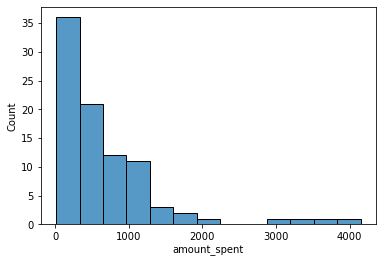

In [128]:
sns.histplot(x=df_spain)

#### Select all orders made in the month of August

In [130]:
df_august = orders[orders.month == 8]

In [131]:
df_august

,Unnamed: 0,InvoiceNo,StockCode,year,month,day,hour,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount_spent
199475,285421,561904,22075,2011,8,1,8,6 ribbons elegant christmas,96,2011-08-01 08:30:00,1.45,17941,United Kingdom,139.20
199476,285422,561904,85049E,2011,8,1,8,scandinavian reds ribbons,156,2011-08-01 08:30:00,1.06,17941,United Kingdom,165.36
199477,285423,561905,21385,2011,8,1,9,ivory hanging decoration heart,24,2011-08-01 09:31:00,0.85,14947,United Kingdom,20.40
199478,285424,561905,84970L,2011,8,1,9,single heart zinc t-light holder,12,2011-08-01 09:31:00,0.95,14947,United Kingdom,11.40
199479,285425,561905,84970S,2011,8,1,9,hanging heart zinc t-light holder,12,2011-08-01 09:31:00,0.85,14947,United Kingdom,10.20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
226483,320688,565067,22644,2011,8,3,17,ceramic cherry cake money bank,2,2011-08-31 17:16:00,1.45,15856,United Kingdom,2.90
226484,320689,565067,22645,2011,8,3,17,ceramic heart fairy cake money bank,2,2011-08-31 17:16:00,1.45,15856,United Kingdom,2.90
226485,320690,565067,22637,2011,8,3,17,piggy bank retrospot,2,2011-08-31 17:16:00,2.55,15856,United Kingdom,5.10
226486,320691,565067,22646,2011,8,3,17,ceramic strawberry cake money bank,2,2011-08-31 17:16:00,1.45,15856,United Kingdom,2.90


#### Select how many orders are made by countries in the month of August
##### Hint: Use value_counts()

Here, I understood order as each element of a purhase invoice. i.e. one stockcode , one order. Several orders is one purchase = one invoice

In [136]:
df_august.Country.value_counts()

United Kingdom     23105
Germany              795
EIRE                 593
France               569
Netherlands          280
Switzerland          267
Spain                252
Belgium              194
Israel               171
Channel Islands      140
Australia            107
Italy                 95
Austria               88
Norway                77
Finland               61
Malta                 55
Portugal              41
Sweden                40
Unspecified           23
Iceland               22
Poland                17
Denmark               16
Canada                 5
Name: Country, dtype: int64

#### What's the  average amount of money spent by country

Understood per invoice

In [144]:
orders.groupby(['Country','InvoiceNo']).amount_spent.sum().groupby('Country').mean()

Country
Australia               2430.198421
Austria                  599.922353
Bahrain                  274.200000
Belgium                  420.370816
Brazil                  1143.600000
Canada                   611.063333
Channel Islands          786.555385
Cyprus                   849.398750
Czech Republic           413.370000
Denmark                 1053.074444
EIRE                    1021.330385
European Community       325.062500
Finland                  549.904390
France                   537.336889
Germany                  500.803370
Greece                   952.104000
Iceland                  615.714286
Israel                  1444.338000
Italy                    460.085263
Japan                   1969.282632
Lebanon                 1693.880000
Lithuania                415.265000
Malta                    545.118000
Netherlands             3004.698316
Norway                  1004.595556
Poland                   386.034211
Portugal                 586.664737
RSA                 

#### What's the most expensive item?

In [146]:
orders.sort_values('UnitPrice', ascending = False).head(1)

,Unnamed: 0,InvoiceNo,StockCode,year,month,day,hour,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount_spent
118352,173382,551697,POST,2011,5,2,13,postage,1,2011-05-03 13:46:00,8142.75,16029,United Kingdom,8142.75


#### What was the average amount spent per year ?

Understood as average total spent per year

In [151]:
orders.groupby(['year']).amount_spent.sum().mean()

4455703.95200168